In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

In [2]:
df=fetch_california_housing()

## Description of the dataset

In [3]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
dataset=pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
dataset.columns=df.feature_names
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


We have 20640 elements in the dataset and 8 features

#### Assigning x, y from the dataframes

In [6]:
x=dataset
y=df.target

##### Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (14448, 8)
Test data shape: (6192, 8)


#### Normalizing the dataset

In [9]:
scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
print(X_train.head())


        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
1328    3.1389      31.0  5.374631   1.100295      2229.0  3.287611     38.02   
17355   5.0113      22.0  6.935484   1.024194      1149.0  3.088710     34.88   
12468   3.4914      44.0  5.963918   1.069588       796.0  2.051546     38.58   
1790    1.0521      40.0  4.451883   1.112971       912.0  3.815900     37.94   
4622   11.2185      52.0  8.300836   1.019499       967.0  2.693593     34.07   

       Longitude  
1328     -121.87  
17355    -120.43  
12468    -121.45  
1790     -122.37  
4622     -118.32  


### Building the Linear Regression Model

In [10]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
mse=cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(np.mean(mse))

-0.5249434720017068


In [12]:
prediction=model.predict(X_test)
prediction

array([1.33170904, 2.42667433, 1.0414557 , ..., 1.09143062, 3.95348884,
       0.64350227])

/home/lalit-karthik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


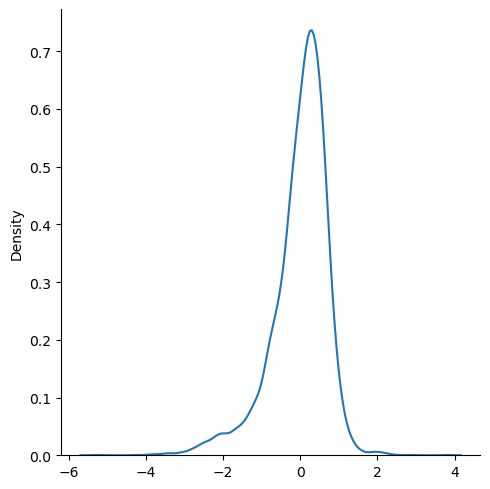

In [13]:
sns.displot(prediction-y_test, kind='kde')

In [14]:
score=model.score(X_test,y_test)
print(f"R2 Score: {score}")

R2 Score: 0.6027333870118272
